Populating the interactive namespace from numpy and matplotlib


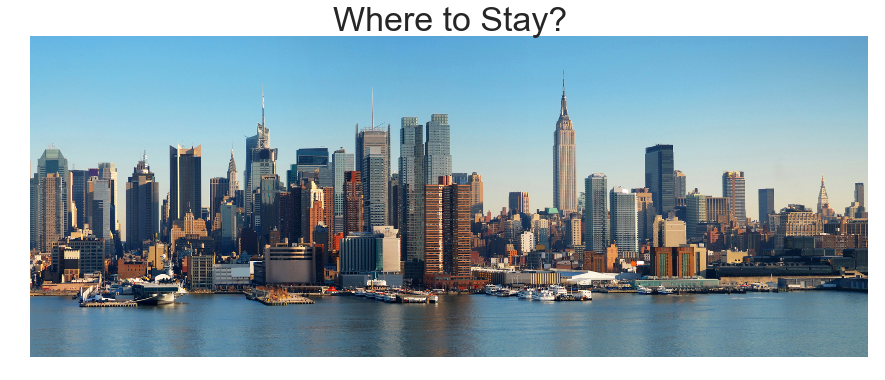

In [1]:
#Library Imports
%pylab inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

##Set Seaborn Style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 12)  
plt.rcParams['figure.dpi'] = (120)  
pd.set_option('display.max_colwidth',52)

##Create Title with image
d_loc = '../../Data/NYC/'
img = plt.imread(d_loc+'nyc_skyline.jpg')
plt.title('Where to Stay?', fontsize=34)
plt.axis('off')
imshow(img)

###1. Basic Overview   
* Data Origins
* Feature Overview
* Exploring the Target: Price

    
###2. Feature Preparation and Selection
* Notable and Fun Observations
* Normalizations, manipulations, adding features
* Helper function for selection significant features
    
###3. Model and Evaluation
* Test and train the model
* Adjustment of hyperparameters
* Evaluation of performance

--------------------------
*April 20, 2015*

*Code and project below created by Duncan Fraser*

In [2]:
##The Raw Dataset
d_loc = '../../../Data/NYC/'
abnb = pd.read_csv(d_loc + 'nyc_airbnb_listings_full.csv')
print "DF Shape:" 
print abnb.shape

DF Shape:
(27392, 52)


#1. Basic Overview

###Data Origins:
This project explores New York City [AirBnB](https://www.airbnb.com/) listings.  The primary dataset used was scraped by [Inside AirBnB](http://insideairbnb.com/new-york-city/) in early January. 

It contains publicly available information on AirBnB's site for listings in the 5 boroughs.  The data frame contains 52 columns and over 27 thousand rows *(see shape above)*. 

####Section 1 explains and explores the data set and reflect an abbreviated version of the exploration work found [here](http://nbviewer.ipython.org/github/duncancfraser/GA_DS18/blob/master/Project/Exploration/AirBnB%20NYC.ipynb).

In [3]:
print abnb.dtypes

id                               int64
scrape_id                        int64
last_scraped                    object
name                            object
picture_url                     object
host_id                          int64
host_name                       object
host_since                      object
host_picture_url                object
street                          object
neighbourhood                   object
neighbourhood_cleansed          object
city                            object
state                           object
zipcode                         object
market                          object
country                         object
latitude                       float64
longitude                      float64
is_location_exact               object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                     

#Feature Overview:

**Below, I've included the feature names and descriptions I'm find most relevant for exploration or consideration:**

No. | Feature Name                |Description              |
----|-----------------------------|-------------------------|
1   | name                        | Listing name                  
2   | host_name                   | Name of host    
3   | host_since                  | Date host joined AirBnB      
4   | neighbourhood_cleansed      | Neighborhood location of listing (e.g East Village)     
5   | zipcode                     | Zipcode of listing    
6   | latitude                    | Lattitude of listing    
7   | longitude                   | Longitude of listing    
8   | property_type               | Property type (e.g. Apt, house, *boat*) 
9   | room_type                   | Room type (e.g. private, shared)
10  | accommodates                | Number of individuals that can stay at the listing      
11  | bathrooms                   | Number of bathrooms for the listing    
12  | bedrooms                    | Number of bedrooms for the listing    
13  | beds                        | Number of beds for the listing    
14  | bed_type                    | Type of bed     
15  | square_feet                 | Square footage of listing     
16  | price                       | Price per night of staying    
17  | guests_included             | Number of people included in the price      
18  | extra_people                | Price bump for additional people    
19  | minimum_nights              | Minimum nights for booking      
20  | maximum_nights              | Maximum nights for booking      
21  | number_of_reviews           | Number of reviews for the listing      
22  | first_review                | Date of first review     
23  | last_review                 | Date of last review     
24  | review_scores_rating        | 1 to 100 overall listing rating    
25  | review_scores_accuracy      | 1 to 10 score for listing accuracy  
26  | review_scores_cleanliness   | 1 to 10 score for listing cleanliness     
27  | review_scores_checkin       | 1 to 10 score for checkin ease     
28  | review_scores_communication | 1 to 10 score for listing communication between host and tourist   
29  | review_scores_location      | 1 to 10 score for listing location   
30  | review_scores_value         | 1 to 10 score for listing value   
31  | host_listing_count          | Total number of listings for this host    

##Target: Listing Price

###Approach:
A large portion of this notebook focuses on understanding price, given listing price plays a large role in the AirBnB marketplace. The listing price is relevant for both sides of the market:

* As a lister, it's only worth using AirBnB if you can charge a good price.  
* Similarly, as a renter, you want to book a highly rated, reasonably priced (whatever that means in NYC) listing. 

--------
###Structure:

1. Preliminary Exploration
2. Normalize for number of individuals included in listing price and create log price in case I'd like to run a regression (as opposed to just a classifier)
3. Visualize to better understand the target

Figure(1800x1440)


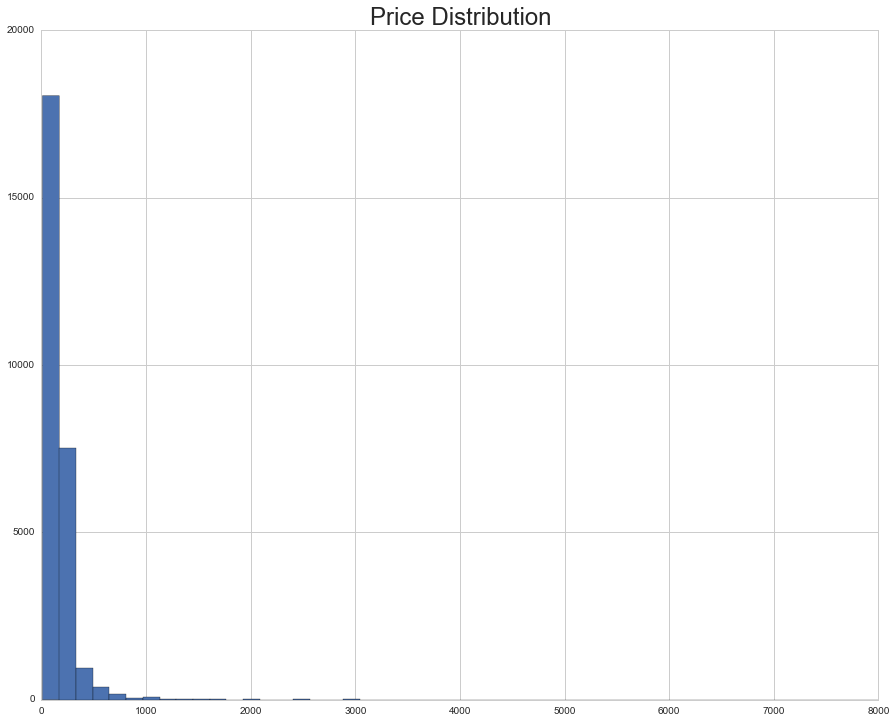

In [5]:
##Step 1: Preliminary Exploration
n_bins = 50
fig = plt.figure()
plt.title('Price Distribution', fontsize = 24)

abnb['price'].hist(bins=n_bins)
print fig

In [6]:
abnb.price.describe()

count    27392.000000
mean       171.256900
std        224.690732
min         10.000000
25%         85.000000
50%        130.000000
75%        199.000000
max       8000.000000
Name: price, dtype: float64

In [7]:
## Setp 2: Normalize for number of individuals included in listing price 
## and create log price because of long-tail distribution shape

# Fixing zero values, absent clear rule on this, assume this means 1 person
abnb[abnb.guests_included == 0] = 1 
# Adjusting price to account for guests included in listing price
abnb['price_adj'] = abnb['price']/abnb['guests_included'] 
# Tag log of normalized price, as the price is long-tailed
abnb['log_price_adj'] = np.log(abnb.price_adj)
# Describe the normalized price 
abnb.price_adj.describe()

count    27392.000000
mean       136.346919
std        215.744979
min          1.000000
25%         63.333333
50%         95.000000
75%        150.000000
max       8000.000000
Name: price_adj, dtype: float64

Figure(1800x1440)


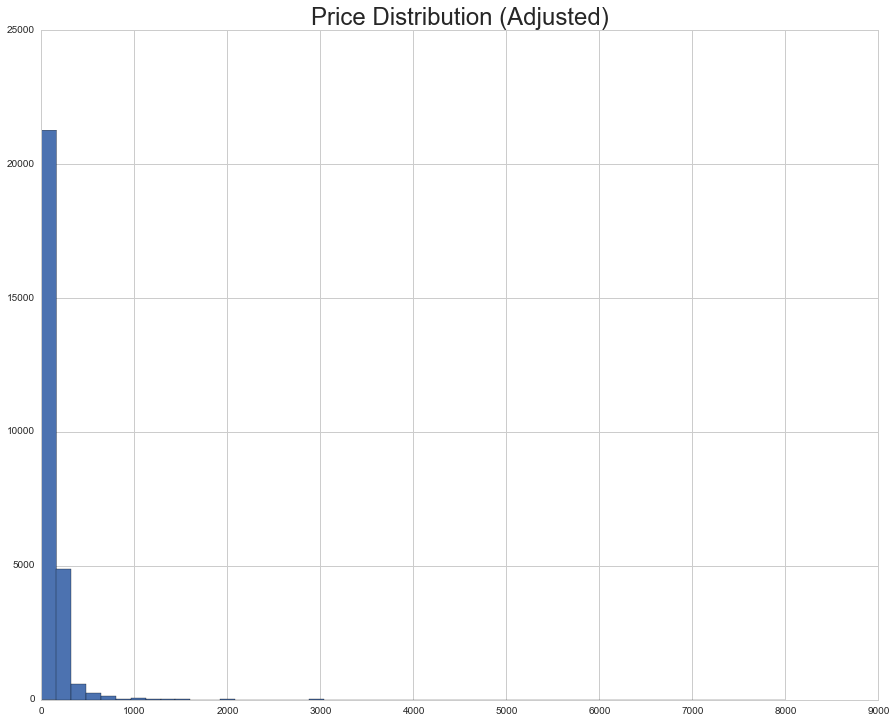

In [8]:
##Look at adjusted price
n_bins = 50

fig = plt.figure()
plt.title('Price Distribution (Adjusted)', fontsize = 24)
abnb['price_adj'].hist(bins=n_bins)

print fig

In [9]:
abnb.log_price_adj.describe()

count    27392.000000
mean         4.555187
std          0.886208
min          0.000000
25%          4.148412
50%          4.553877
75%          5.010635
max          8.987197
Name: log_price_adj, dtype: float64

Figure(1800x1440)


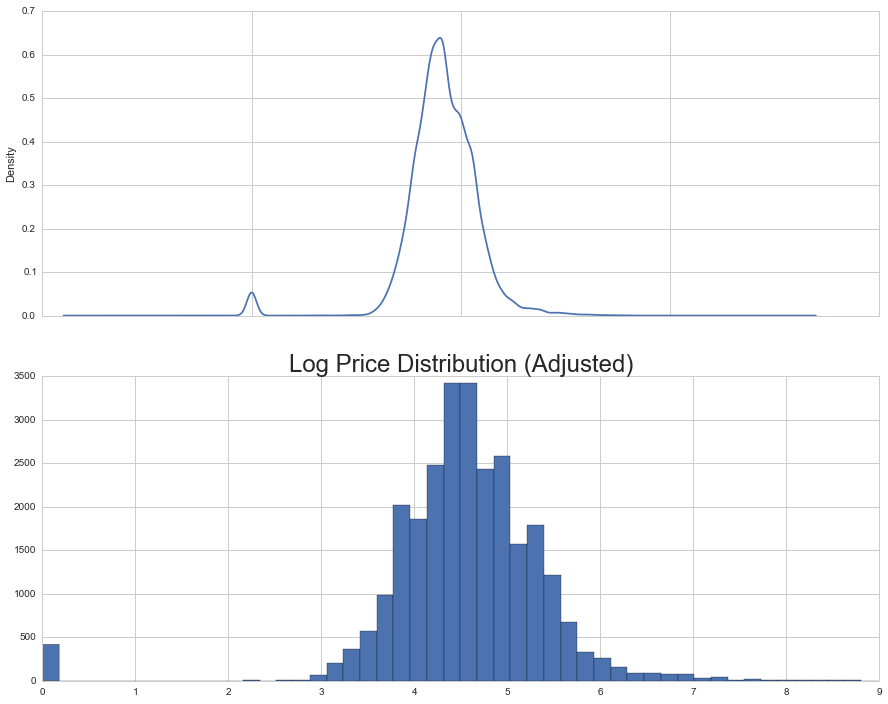

In [10]:
##Look at adjusted log price (does it look normalish?
n_bins = 50
fig, axes = plt.subplots(nrows=2, ncols=1,)

plt.title('Log Price Distribution (Adjusted)', fontsize = 24)

abnb['log_price_adj'].plot(ax=axes[0], kind='kde')
abnb['log_price_adj'].hist(ax=axes[1], bins=n_bins)

print fig

#2. Feature Preparation and Selection

In [6]:
#Property type mean prices to identify seperation
prop_price_grp = abnb.groupby('property_type').price_adj.mean()

prop_price_grp.reset_index()

prop_price_grp.sort('price', ascending=False)

prop_price_grp

NameError: name 'abnb' is not defined

In [49]:
bedtype_price_grp = abnb.groupby('bed_type').price_adj.mean()

bedtype_price_grp.reset_index()

bedtype_price_grp.sort('price_adj', ascending=False)

bedtype_price_grp

bed_type
Real Bed         140.353171
Airbed           127.276988
Couch            109.537582
Pull-out Sofa     91.601852
Futon             78.324775
1                  1.000000
Name: price_adj, dtype: float64

In [48]:
room_price_grp = abnb.groupby('room_type').price_adj.mean()

room_price_grp.reset_index()

room_price_grp.sort('price_adj', ascending=False)

room_price_grp

room_type
Entire home/apt    174.550423
Private room        88.598068
Shared room         76.275443
1                    1.000000
Name: price_adj, dtype: float64

##Categorical Variable Exploration 
Above, I look at some key categorical features: property type, room type, and bed type.  In each case I observed price differences between the possible type, indicating it may be valuable to include these in my decision tree classifier.

Below, I map these categorical variables to numeric values to allow them to be passed into the algorithm.  For Bed and Room type I map each descrete category as its own value.  In the case of property type, I condensed a into 3 values based on clusters of mean prices.

**Fun Note:** *I find the property type in particular amusing - notably, you can rent a boat, a tent, a lighthouse, a treehouse, castle, villa or dorm room if a house, apartment or loft isn't your style*

In [12]:
##Map bed type, property type and room type
abnb['room_map'] = abnb.room_type.map({'Entire home/apt':0,'Private room':1, 'Shared room':2})

abnb['bed_map'] = abnb.bed_type.map({'Futon':0,
                                     'Real Bed':1, 
                                     'Airbed':2,
                                     'Couch':3,          
                                     'Pull-out Sofa':4})

# Categories here based on looking at average price by type.  0's all had higher than average price,
abnb['prop_map'] = abnb.property_type.map({'Loft':0,
                                           'Other':0, 
                                           'Boat':0,
                                           'Apartment':1,          
                                           'House':2,
                                           'Cabin':2,                  
                                           'Tent':2,
                                           'Lighthouse':2,    
                                           'Bed & Breakfast':2,      
                                           'Dorm':2,                  
                                           'Treehouse':2,              
                                           'Villa':2,                                                                
                                           'Camper/RV':2,                                                                  
                                           'Earth House':2,            
                                           'Chalet':2,                 
                                           'Cave':2,                   
                                           'Castle':2,                 
                                           'Hut':2})

print "Room Types Mapped:"
print abnb.room_map.value_counts() 
print "Property Types Mapped:"
print abnb.prop_map.value_counts()
print "Bed Types Mapped:"
print abnb.bed_map.value_counts()

Room Types Mapped:
0    15760
1    10404
2      809
dtype: int64
Property Types Mapped:
1    24519
2     1795
0      654
dtype: int64
Bed Types Mapped:
1    25869
0      481
4      324
2      197
3      102
dtype: int64


##Enrichment:
Next I would like to pull in a more reliable definition for neighborhood, as well as create a borough feature.  I would like to do this for two reasons:

1. For my classifier, I would like to better understand what features lead to notably more expensive listings by borough. 
2. I would like to include neighborhood as a feature in this algorithm as I suspect within a borough not all neighborhoods are created equal.

To do this, I use beautiful soup to create a dataframe of a [table](https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm) found on New York State's Health website.

In [13]:
#Import beautiful soup, pull url and define soup 
import bs4
import requests

url = requests.get('https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm')
soup = bs4.BeautifulSoup(url.text)

table = soup.find('table')
rows = table.find_all('tr')       

In [14]:
#Iterate through data pull into 3 columns
data_set = []
a, b, c = None, None, None ## Set deafault as none, to be overrideen in cases where the header 
for row in rows:
    cols = row.find_all('td')
    for td in cols:
        if td['headers'] == ['header1']:
            a = td.text
        if td['headers'] == ['header2']:
            b = td.text
        if td['headers'] == ['header3']:
            c = td.text
    data_set.append([a, b, c])

In [15]:
#Slice off top of data as it is None, None, None per code above
data = data_set[1:]

In [16]:
# Re-organize data so that each column corresponds to a zip code with an associated neighborhood and borough
borough=[]
neigh=[]
zips = []

for row in data:
    zipr = row[2].split(',')
    L=len(zipr)
    i=0
    while i <L:
        borough.append(row[0])
        neigh.append(row[1])
        zippp=zipr[i]
        zips.append(zippp)
        i+=1

zip_map = pd.DataFrame(zips)

zip_map['boro']=borough
zip_map['hood']=neigh
zip_map.dtypes

0       object
boro    object
hood    object
dtype: object

In [17]:
# Check structure of final zip map
zip_map.boro.value_counts()

Queens           61
Manhattan        41
Brooklyn         37
Bronx            25
Staten Island    12
dtype: int64

In [18]:
# Remove whitespace
zip_map['boro'] = zip_map['boro'].apply(lambda x: x.strip())
zip_map['hood'] = zip_map['hood'].apply(lambda x: x.strip())

In [19]:
#Check structure of final zip map
zip_map.hood.value_counts()

Southeast Queens                 9
Southwest Queens                 8
Jamaica                          7
West Queens                      7
North Queens                     7
Southeast Bronx                  6
Chelsea and Clinton              6
Northwest Queens                 6
Rockaways                        6
Lower Manhattan                  6
Inwood and Washington Heights    5
Central Brooklyn                 5
Northwest Brooklyn               5
Central Harlem                   5
South Shore                      5
Flatbush                         4
Northeast Bronx                  4
Northeast Queens                 4
Gramercy Park and Murray Hill    4
Borough Park                     4
Upper East Side                  4
Southern Brooklyn                4
West Central Queens              4
Hunts Point and Mott Haven       4
High Bridge and Morrisania       3
Canarsie and Flatlands           3
Central Queens                   3
Bronx Park and Fordham           3
Stapleton and St. Ge

In [20]:
# Remove whitespace and create column with same name as corresponding column in abnb dataset
zip_map['zipcode'] = zip_map[0].apply(lambda x: x.strip())

In [21]:
# Remove whitespace and prepare for merge
abnb.zipcode = abnb.zipcode.apply(lambda x: str(x).strip())

In [22]:
# Merge map on original dataframe to add new features
abnb_e = pd.merge(abnb, zip_map)

In [23]:
# Check dataframe to see if mapping worked
abnb_e.boro.value_counts()

Manhattan        14789
Brooklyn          9112
Queens            1722
Bronx              235
Staten Island      127
dtype: int64

In [24]:
# Check dataframe to see where most listings lie (of those that were mapped)
abnb_e.hood.value_counts()

Lower East Side                  3099
Chelsea and Clinton              2701
Northwest Brooklyn               2072
Central Brooklyn                 1917
Greenwich Village and Soho       1868
Greenpoint                       1816
Bushwick and Williamsburg        1780
Upper West Side                  1479
Gramercy Park and Murray Hill    1311
Inwood and Washington Heights    1096
Central Harlem                   1088
Upper East Side                   938
Northwest Queens                  911
Flatbush                          744
East Harlem                       634
Lower Manhattan                   575
West Queens                       269
West Central Queens               225
Borough Park                      216
East New York and New Lots        208
Sunset Park                       158
Stapleton and St. George           84
Southern Brooklyn                  77
Southwest Queens                   77
Jamaica                            73
Southwest Brooklyn                 72
North Queens

##New Feature Exploration

With new features added, I want to make sure there are differences in average price across both borough and nieghborhood, the below code creates groupings and visualizations aimed at exploring this question.

In both cases, I see mostly unsurprising results. Manhattan is the most expensive borough and the posh mid- and downtown Manhattan neighborhoods comprise the most expensive neighborhoods,  followed by the hip, increasingly yuppie neighborhoods in northwest and north Brooklyn.

Finally I map the various nieghborhoods 0-9 for each borough so that I can use them in the classifier.  After that, I take a comparative approach to exploring and visualizing listing price across the 3 boroughs with sufficient volume for further analysis and classification: 

* Manhattan
* Brooklyn
* Queens

In [25]:
boro_price_grp = abnb_e.groupby('boro').price.mean()

boro_price_grp.reset_index()

boro_price_grp.sort('price_adj', ascending=False)

boro_price_grp

boro
Manhattan        206.628575
Staten Island    187.748031
Brooklyn         128.518766
Queens           102.473287
Bronx             85.689362
Name: price, dtype: float64

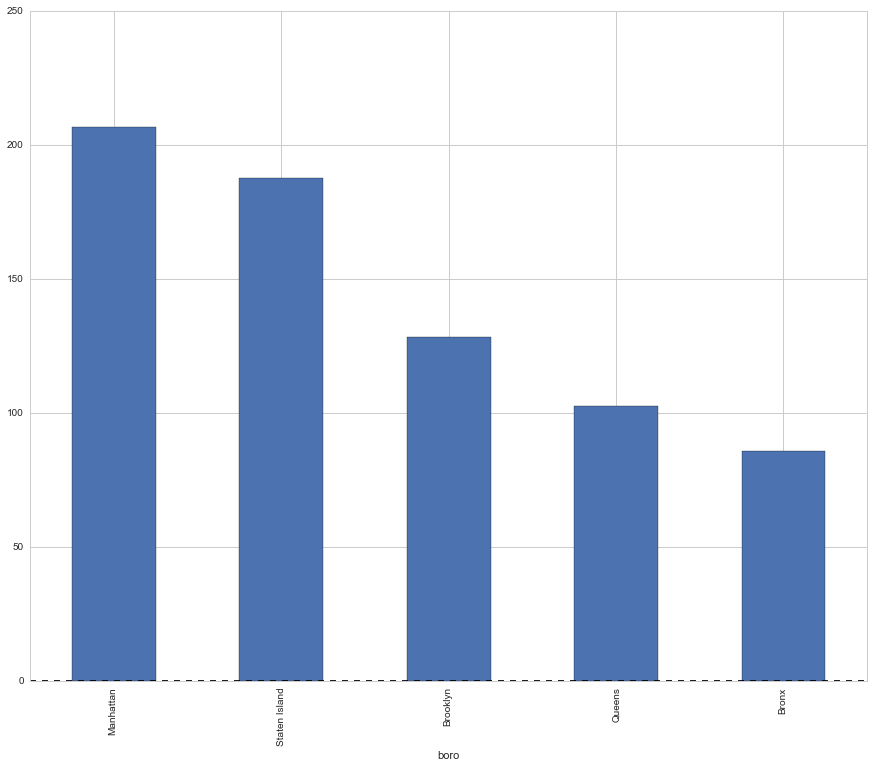

In [26]:
boro_price_grp.plot(kind='bar')

In [27]:
hood_price_grp = abnb_e.groupby('hood').price.mean()

hood_price_grp.reset_index()

hood_price_grp.sort('price_adj', ascending=False)

hood_price_grp

hood
Port Richmond                    281.888889
Greenwich Village and Soho       266.648287
Gramercy Park and Murray Hill    262.392067
Lower Manhattan                  258.838261
Chelsea and Clinton              235.956312
Upper West Side                  212.260987
South Shore                      195.173913
Lower East Side                  194.301388
Upper East Side                  193.417910
Stapleton and St. George         183.678571
Northwest Brooklyn               168.562259
Greenpoint                       143.732379
Central Queens                   137.500000
East Harlem                      130.279180
Southwest Queens                 129.922078
Mid-Island                       126.272727
Central Brooklyn                 126.200835
Northeast Queens                 123.777778
Central Harlem                   121.215993
Kingsbridge and Riverdale        114.800000
Rockaways                        113.960784
Northwest Queens                 110.568606
Southern Brooklyn          

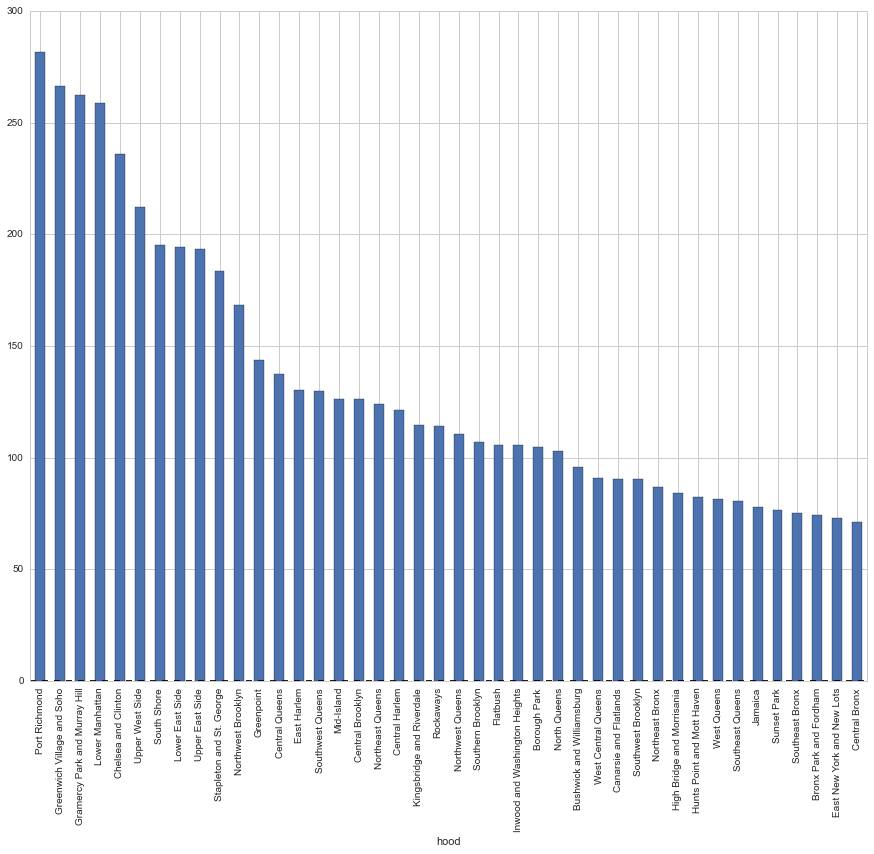

In [28]:
hood_price_grp.plot(kind='bar')

In [29]:
abnb_e['hood_map'] = abnb_e.hood.map({'Lower East Side':0,
                                      'Chelsea and Clinton':1,
                                      'Greenwich Village and Soho':2,
                                      'Upper West Side':3,
                                      'Gramercy Park and Murray Hill':4,
                                      'Inwood and Washington Heights':5,
                                      'Central Harlem':6,
                                      'Upper East Side':7,
                                      'East Harlem':8,
                                      'Lower Manhattan':9,
                                      'Northwest Brooklyn':0,
                                      'Central Brooklyn':1,
                                      'Greenpoint':2,
                                      'Bushwick and Williamsburg':3,
                                      'Flatbush':4,
                                      'Borough Park':5,
                                      'East New York and New Lots':6,
                                      'Southern Brooklyn':7,
                                      'Southwest Brooklyn':8,
                                      'Canarsie and Flatlands':9,
                                      'Northwest Queens':0,
                                      'West Queens':1,
                                      'West Central Queens':2,
                                      'Southwest Queens':3,
                                      'Jamaica':4,
                                      'North Queens':5,
                                      'Rockaways':6,
                                      'Southeast Queens':7,
                                      'Central Queens':8,
                                      'Northeast Queens':9})

In [30]:
manhattan = abnb_e[abnb_e.boro == 'Manhattan']
brooklyn = abnb_e[abnb_e.boro == 'Brooklyn']
queens = abnb_e[abnb_e.boro == 'Queens']

In [31]:
manhattan.price_adj.describe()

count    14789.000000
mean       169.416657
std        250.745859
min          6.500000
25%         80.000000
50%        120.000000
75%        189.000000
max       6950.000000
Name: price_adj, dtype: float64

In [32]:
queens.price_adj.describe()

count    1722.000000
mean       81.344731
std        88.189754
min        10.833333
25%        49.000000
50%        65.000000
75%        95.000000
max      2500.000000
Name: price_adj, dtype: float64

In [33]:
brooklyn.price_adj.describe()

count    9112.000000
mean       99.263797
std       161.838592
min         4.666667
25%        53.000000
50%        75.000000
75%       110.000000
max      8000.000000
Name: price_adj, dtype: float64

Figure(1800x1440)


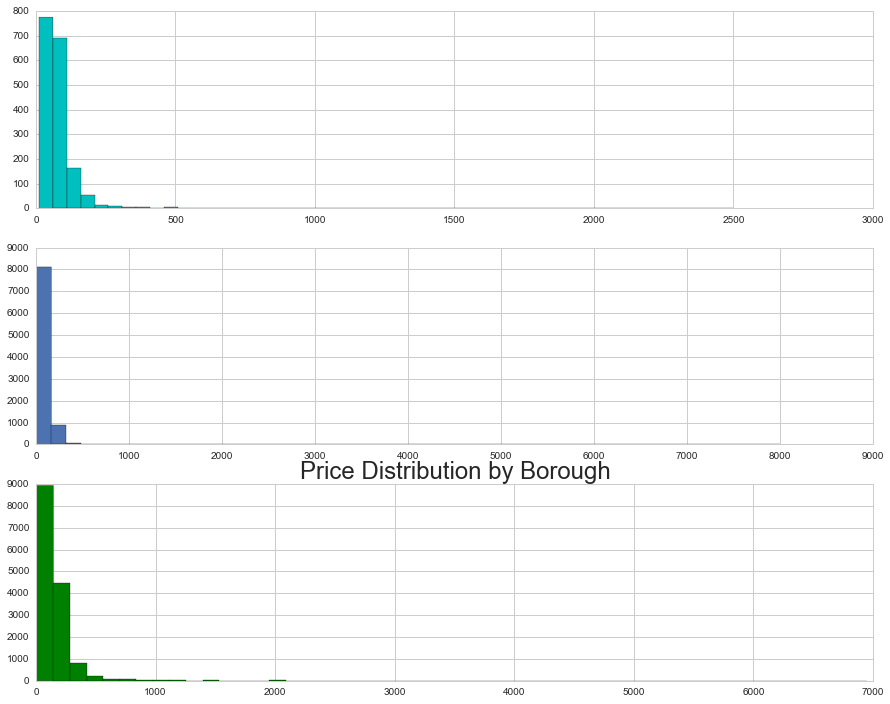

In [34]:
#Tranforming using log for better prediction results - appears it may be bi-modal??
n_bins = 50
fig, axes = plt.subplots(nrows=3, ncols=1,)

plt.title('Price Distribution by Borough', fontsize = 24)

queens.price_adj.hist(ax=axes[0], bins=n_bins, color='c')
brooklyn.price_adj.hist(ax=axes[1], bins=n_bins)
manhattan.price_adj.hist(ax=axes[2], bins=n_bins, color='g')

print fig

Figure(1800x1440)


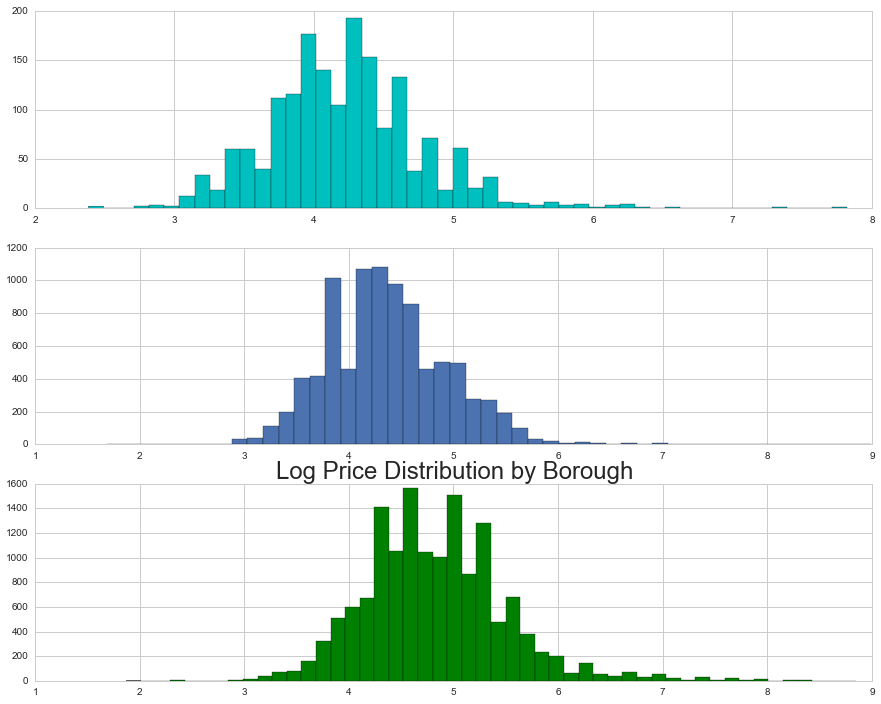

In [35]:
#Tranforming using log for better prediction results - appears it may be bi-modal??
n_bins = 50
fig, axes = plt.subplots(nrows=3, ncols=1,)

plt.title('Log Price Distribution by Borough', fontsize = 24)

queens.log_price_adj.hist(ax=axes[0], bins=n_bins, color='c')
brooklyn.log_price_adj.hist(ax=axes[1], bins=n_bins)
manhattan.log_price_adj.hist(ax=axes[2], bins=n_bins, color='g')

print fig

In [37]:
manh_line = manhattan.price_adj.mean() + (manhattan.price_adj.std() / 2)
bk_line = brooklyn.price_adj.mean() + (brooklyn.price_adj.std() / 2)
qns_line = queens.price_adj.mean() + (queens.price_adj.std() / 2)

print "Overpriced in Manhattan: %f, Brooklyn: %f, and Queens: %f" % (round(manh_line,2), round(bk_line,2), round(qns_line,2))

Overpriced in Manhattan: 294.790000, Brooklyn: 180.180000, and Queens: 125.440000


In [38]:
manhattan['overpriced'] = manhattan.price_adj.apply(lambda x: 1 if x > manh_line else 0)
brooklyn['overpriced'] = brooklyn.price_adj.apply(lambda x: 1 if x > bk_line else 0)
queens['overpriced'] = queens.price_adj.apply(lambda x: 1 if x > qns_line else 0)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveat

##Final Target Preparation

Before I start identifying which features to pass into the classifier, I need to adjust my target.  From previous experience, I know I cannot predict price exactly, so I am shifting the question to explore what influences a 'high' listing price.  In this case, I define a 'high' price *somewhat arbitrarily* as 1/2 standard deviation above the mean price for a given borough. This was born of both theoretical and practical concerns.  While I wanted to take the price distribution into account, I also need enough observed 'high' price listings to be able to pull out patterns.

In [39]:
queens.overpriced.value_counts()

0    1535
1     187
dtype: int64

In [71]:
from __future__ import division
qns_thresh = 1535  / (187 + 1535)
print qns_thresh

0.891405342625


In [43]:
brooklyn.overpriced.value_counts()

0    8360
1     752
dtype: int64

In [72]:
bk_thresh = 8360 / (752 + 8360)
print bk_thresh

0.917471466198


In [45]:
manhattan.overpriced.value_counts()

0    13438
1     1351
dtype: int64

In [73]:
man_thresh = 13438 / (1351 + 13438)
print man_thresh

0.908648319697


##Feature Selection

The below code creates a helper function to identify influencial features to include in the classifier.  I use this as my first machine, proces-based filter (so far its all been my hypotheses) for determining what to include in each classifier. 

From there, I test and train the decision tree for each borough, optimizing for max depth, and paring down features based on gini importance.  

In each case I produce a ROC Curve as well as a confusion matrix.  Finally I compare the accuracy of the classifier against a manual threshold (calculated above) based on the true 'dumbest' guess: what your accuracy would be if you simply guessed no listing had a high price.

In [50]:
##Quickly confirm that these seem to have low pvals in predicting price
from sklearn import feature_selection as f_select

def sig_features(X, y, threshold=0.05):
    """Given a column list, a feature set, a target, and a p value threshold, return all columns that show low p-values.
    X         : dataframe containing the feature set
    y         : target values for the model
    threshold : default is 0.5, threshold p value that each feature must fall below
    """
    significant_features = []
    
    for feature in X:
        pval = f_select.f_classif(X[feature],y)
        if pval[1][0] < threshold:
            significant_features.append(feature)
    print '%d Features are worth further consideration. (With P-Values below %f)' %(len(significant_features), threshold) 
    return significant_features

In [78]:
final       =['accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'bed_map',
              'minimum_nights',
              'maximum_nights',
              'number_of_reviews',
              'host_listing_count',
              'room_map',
              'prop_map',
              'hood_map',
              'overpriced']

feature_set =['accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'bed_map',
              'minimum_nights',
              'maximum_nights',
              'number_of_reviews',
              'host_listing_count',
              'room_map',
              'prop_map',
              'hood_map']

In [79]:
test = manhattan[final].dropna()
X = test[feature_set]
y = test.overpriced
X.describe()

,accommodates,bathrooms,bedrooms,beds,bed_map,minimum_nights,maximum_nights,number_of_reviews,host_listing_count,room_map,prop_map,hood_map
count,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.00000,14468.000000,14468.000000,14468.00000
mean,2.894526,1.101880,1.087780,1.493848,1.038844,2.574578,1524.097871,10.184753,1.58778,0.373583,1.000622,3.04313
std,1.631646,0.336058,0.659198,0.909177,0.386237,2.600792,83889.466259,18.732054,1.56960,0.535837,0.170588,2.70116
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.00000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,0.000000,1.00000,0.000000,1.000000,1.00000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1125.000000,3.000000,1.00000,0.000000,1.000000,2.00000
75%,4.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1125.000000,11.000000,2.00000,1.000000,1.000000,5.00000
max,16.000000,6.000000,8.000000,16.000000,4.000000,30.000000,9999999.000000,207.000000,25.00000,2.000000,2.000000,9.00000


In [80]:
sig_features(X, y)

11 Features are worth further consideration. (With P-Values below 0.050000)


['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_map',
 'minimum_nights',
 'number_of_reviews',
 'host_listing_count',
 'room_map',
 'prop_map',
 'hood_map']

In [81]:
def train_and_measure(classifier, x, y, t_size):
    from sklearn import cross_validation
    """
    Function accepts a classifier from sklearn and computes the accuracy measure for a random train and test split.
    classifier: an sklearn class
    x         : a matrix of features
    y         : a vector of targets
    """
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=t_size, random_state=1234)
    clf = classifier.fit(xtrain, ytrain)
    #Print the accuracy on the test and training dataset
    training_accuracy = clf.score(xtrain, ytrain)
    test_accuracy = clf.score(xtest, ytest)
    print classifier
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    

def kfold_xvalid(classifier, x, y, shuffle_on, folds, return_plt=False):
    """
    Function accepts a classifier from sklearn and computes the accuracy measure for a kfold cross validation.
    classifier: an sklearn class
    x         : a matrix of features
    y         : a vector of targets
    folds     : number of folds
    """
    import numpy as np
    from sklearn import cross_validation
    kfold = cross_validation.KFold(n=x.shape[0], n_folds=folds, shuffle=shuffle_on, random_state=1234)
    train_acc = []
    test_acc = []
    for train_index, test_index in kfold:
        clf = classifier.fit(x[train_index], y[train_index])
        train_acc.append(clf.score(x[train_index], y[train_index]))
        test_acc.append(clf.score(x[test_index], y[test_index]))
    
    print 'Mean               : %f' % (np.array(test_acc).mean())
    print 'Standard Deviation : %f' % (np.array(test_acc).std())
    print '-'*30
    if return_plt:
        plt.figure()
        sns.kdeplot(np.random.normal(loc=np.array(test_acc).mean(), scale=np.array(test_acc).std(), size=10000), shade=True)    
    
def find_k(classifier, x, y, max_num_k):
    import numpy as np
    from sklearn import cross_validation
    k_train_acc = []
    k_test_acc = []
    for i in range(2, max_num_k):
        kfold = cross_validation.KFold(n=x.shape[0], n_folds=i, shuffle=True, random_state=1234)
        test_acc, train_acc = [], []
        for train_index, test_index in kfold:
            clf = classifier.fit(x[train_index], y[train_index])
            train_acc.append(clf.score(x[train_index], y[train_index]))
            test_acc.append(clf.score(x[test_index], y[test_index]))
        k_train_acc.append(np.array(train_acc).mean())
        k_test_acc.append(np.array(test_acc).mean())

    print 'Fit Chart'
    plt.figure()
    plt.plot(range(2, max_num_k), k_train_acc)
    plt.plot(range(2, max_num_k), k_test_acc)

In [82]:
new_feat =  ['accommodates',
             'bathrooms',
             'bedrooms',
             'beds',
             'bed_map',
             'minimum_nights',
             'number_of_reviews',
             'host_listing_count',
             'room_map',
             'prop_map',
             'hood_map']
X = test[new_feat]

In [83]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [84]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best')

Best score: 0.84213395061
Best depth: 4


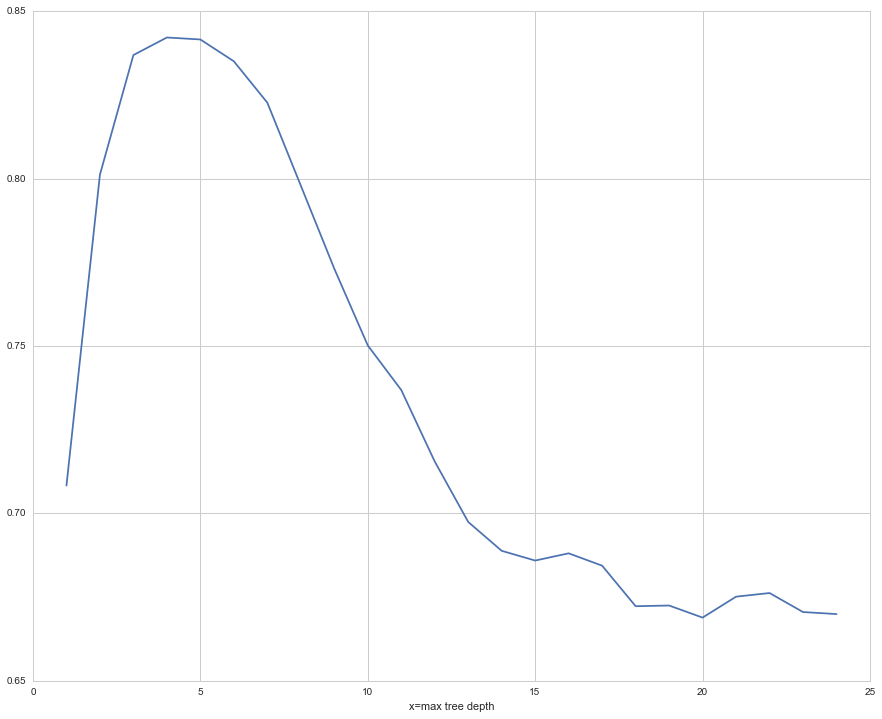

In [85]:
from sklearn.cross_validation import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns

all_scores = []
best_score = 1
best_depth = 0
lo = 1
hi = 25 
for i in range(lo, hi):
    treeclf = DecisionTreeClassifier(max_depth=i, random_state=1)
    score = cross_val_score(treeclf, X, y, cv=3, scoring='roc_auc')
    current_score = np.mean(score)
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score > best_score or best_score == 1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treeclf = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
treeclf.fit(X, y)

plt.figure()
plt.plot(range(lo, hi), all_scores)
plt.xlabel('x=max tree depth')

In [86]:
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best')

In [87]:
pd.DataFrame({'feature':new_feat, 'importance':treeclf.feature_importances_})

,feature,importance
0,accommodates,0.013200
1,bathrooms,0.049852
2,bedrooms,0.521705
3,beds,0.000465
4,bed_map,0.000000
5,minimum_nights,0.039917
6,number_of_reviews,0.285805
7,host_listing_count,0.011923
8,room_map,0.069525
9,prop_map,0.000000


In [88]:
new_feat =  ['accommodates',
             'bathrooms',
             'bedrooms',
             'beds',
             'minimum_nights',
             'number_of_reviews',
             'host_listing_count',
             'room_map',
             'hood_map']

X = test[new_feat]

In [89]:
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
treeclf.fit(X_train, y_train)
pd.DataFrame({'feature':new_feat, 'importance':treeclf.feature_importances_})

,feature,importance
0,accommodates,0.013200
1,bathrooms,0.049852
2,bedrooms,0.521705
3,beds,0.000465
4,minimum_nights,0.039917
5,number_of_reviews,0.285805
6,host_listing_count,0.011923
7,room_map,0.069525
8,hood_map,0.007609


In [92]:
from __future__ import division
def true_confusion_matrix(mtrx):
    return np.array([[mtrx[1, 1], mtrx[0, 1]], [mtrx[1, 0], mtrx[0, 0]]])

true_conf = true_confusion_matrix(conf)

# false positive rate (fpr) = false positives / (false positives + true negatives)
# "What percent of the negatives were predicted as positive?"
# Goal: keep this low
def fpr(confusion):
    return confusion[0, 1] / (confusion[0, 1] + confusion[1, 1])


# true positive rate/recall (tpr) = true positives / (true positives + false negatives)
# "What percent of the positives were accurately measured as positives?"
# Goal: keep this high
def tpr(confusion):
    return confusion[0, 0] / (confusion[0, 0] + confusion[1, 0])


# precision = true positives / (true positives + false positives)
# "What percent of predicted positives were truly positive?
# Goal: keep this high
def precision(confusion):
    return confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])

    
# accuracy = (true positives + true negatives) / total observations
# "What percent of values were accurately predicted?"
# Goal: Keep this high
def acc(confusion):
    return (confusion[0, 0] + confusion[1, 1]) / (confusion[0, 0] + confusion[1, 1] + confusion[0, 1] + confusion[1, 0])
    
# auc = calculate area under x=fpr, y=tpr

fpr 0.014996954933
tpr 0.240990990991
precision 0.619691119691
accuracy 0.916505391208
threshold 0.908648319697


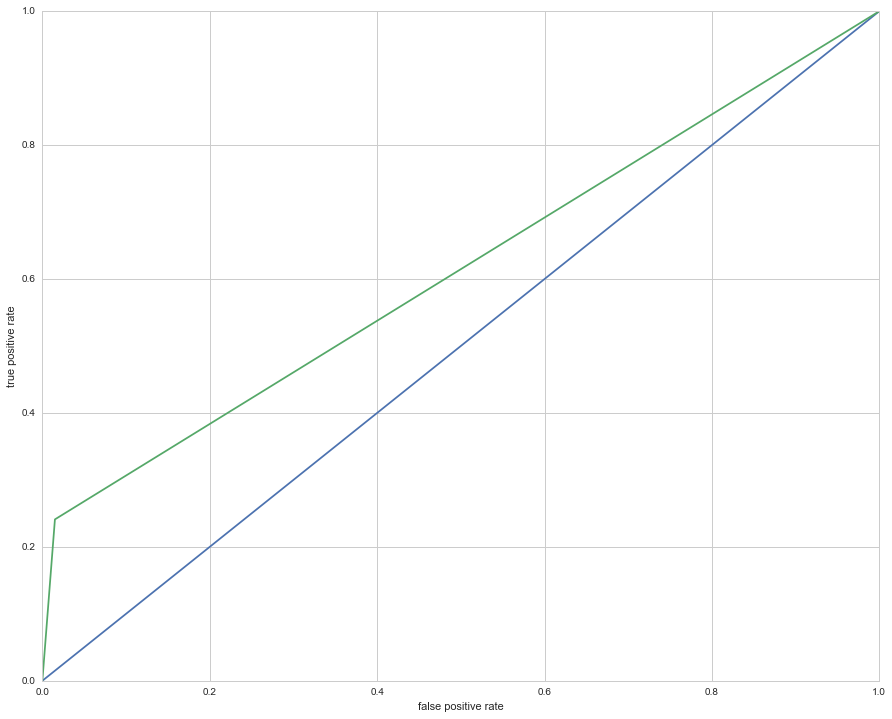

In [93]:
# sklearn has all of this built in:

print 'fpr', metrics.roc_curve(y, treeclf.predict(X))[0][1] #fpr
print 'tpr', metrics.roc_curve(y, treeclf.predict(X))[1][1] #tpr
print 'precision', metrics.precision_score(y, treeclf.predict(X))
print 'accuracy', metrics.accuracy_score(y, treeclf.predict(X))
print 'threshold', man_thresh

roc = metrics.roc_curve(y, treeclf.predict(X))
plt.figure()
# dummy, what's the worst random job we can do?
plt.plot([0, 0.5, 1], [0, 0.5, 1])
plt.plot(roc[0], roc[1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

##Model Evaluation: Manhattan
Based on the above results after adjusting features used and max depth, I would conclude that this model is only marginally useful relative to the baseline "assume all listings do not have a 'high' price".  The model precision isn't particularly strong, however it does better than a coin flip so again, this indicates marginal value.


As I go through and run a similar exercise for the remaining boroughs I'll be interested in what differences in feature selection emerge.  This comparison may yeild more interesting results than merely evaluating each model's standalone value, especially since in all three cases the threshold for accuracy is fairly high.

Top 3 Features by Gini Importance for Manahattan Model:

1. Bedrooms (0.52)
2. Number of Reviews (0.29)
3. Room Type (0.07)

In [94]:
test = brooklyn[final].dropna()
X = test[feature_set]
y = test.overpriced
X.describe()

,accommodates,bathrooms,bedrooms,beds,bed_map,minimum_nights,maximum_nights,number_of_reviews,host_listing_count,room_map,prop_map,hood_map
count,8740.000000,8740.000000,8740.000000,8740.000000,8740.000000,8740.000000,8.740000e+03,8740.000000,8740.000000,8740.000000,8740.000000,8740.000000
mean,2.932952,1.149085,1.216819,1.609611,1.017963,2.604348,1.150846e+05,9.663959,1.917277,0.527689,1.068535,1.990275
std,1.919740,0.412534,0.671637,1.350219,0.363103,2.624491,1.069656e+07,18.078968,2.652925,0.564857,0.383602,1.743481
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+01,0.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.125000e+03,3.000000,1.000000,0.000000,1.000000,2.000000
75%,4.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.125000e+03,11.000000,2.000000,1.000000,1.000000,3.000000
max,16.000000,7.000000,10.000000,16.000000,4.000000,27.000000,1.000000e+09,221.000000,28.000000,2.000000,2.000000,9.000000


In [95]:
sig_features(X, y)

8 Features are worth further consideration. (With P-Values below 0.050000)


['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'host_listing_count',
 'room_map',
 'hood_map']

In [96]:
new_feat =  ['accommodates',
             'bathrooms',
             'bedrooms',
             'beds',
             'number_of_reviews',
             'host_listing_count',
             'room_map',
             'hood_map']
X = test[new_feat]

Best score: 0.763496614495
Best depth: 5


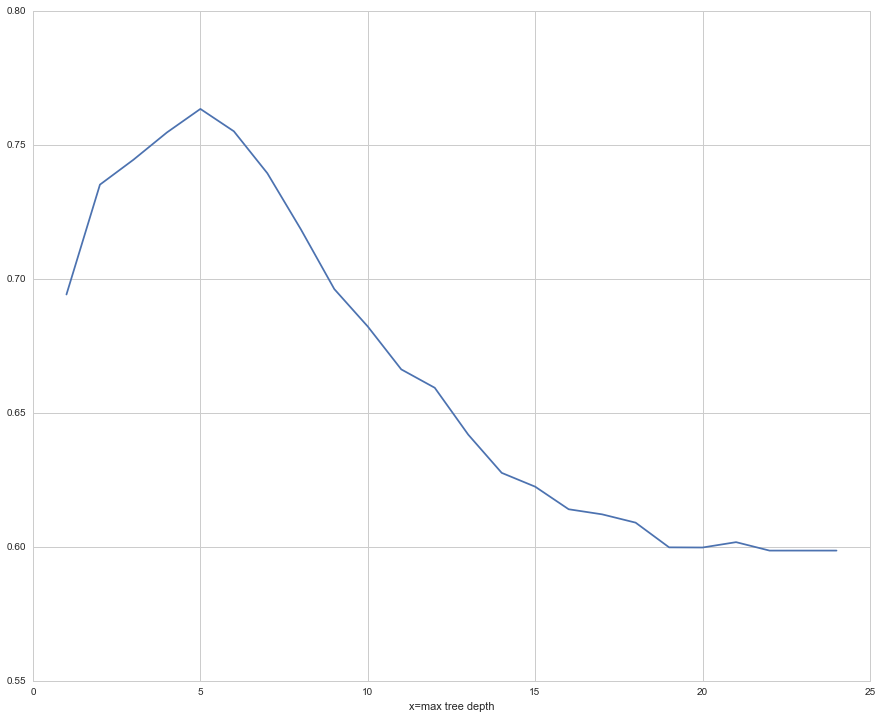

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)
all_scores = []
best_score = 1
best_depth = 0
lo = 1
hi = 25 
for i in range(lo, hi):
    treeclf = DecisionTreeClassifier(max_depth=i, random_state=1)
    score = cross_val_score(treeclf, X, y, cv=3, scoring='roc_auc')
    current_score = np.mean(score)
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score > best_score or best_score == 1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treeclf = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
treeclf.fit(X, y)

plt.figure()
plt.plot(range(lo, hi), all_scores)
plt.xlabel('x=max tree depth')

In [98]:
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best')

In [99]:
pd.DataFrame({'feature':new_feat, 'importance':treeclf.feature_importances_})

,feature,importance
0,accommodates,0.061938
1,bathrooms,0.189696
2,bedrooms,0.371812
3,beds,0.000000
4,number_of_reviews,0.171573
5,host_listing_count,0.019406
6,room_map,0.074452
7,hood_map,0.111123


In [100]:
new_feat =  ['accommodates',
             'bathrooms',
             'bedrooms',
             'number_of_reviews',
             'host_listing_count',
             'room_map',
             'hood_map']

X = test[new_feat]

In [102]:
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
treeclf.fit(X_train, y_train)
pd.DataFrame({'feature':new_feat, 'importance':treeclf.feature_importances_})

,feature,importance
0,accommodates,0.061938
1,bathrooms,0.189696
2,bedrooms,0.371812
3,number_of_reviews,0.175219
4,host_listing_count,0.019406
5,room_map,0.074452
6,hood_map,0.107476


In [103]:
# Compute the confusion matrix
from sklearn import metrics
conf = metrics.confusion_matrix(y, treeclf.predict(X))
true_conf = true_confusion_matrix(conf)
print true_conf
print 'fpr', fpr(true_conf)
print 'tpr', tpr(true_conf)
print 'precision', precision(true_conf)
print 'accuracy', acc(true_conf)

[[ 129   78]
 [ 605 7928]]
fpr 0.00974269298026
tpr 0.175749318801
precision 0.623188405797
accuracy 0.921853546911


fpr 0.00974269298026
tpr 0.175749318801
precision 0.623188405797
accuracy 0.921853546911
threshold 0.917471466198


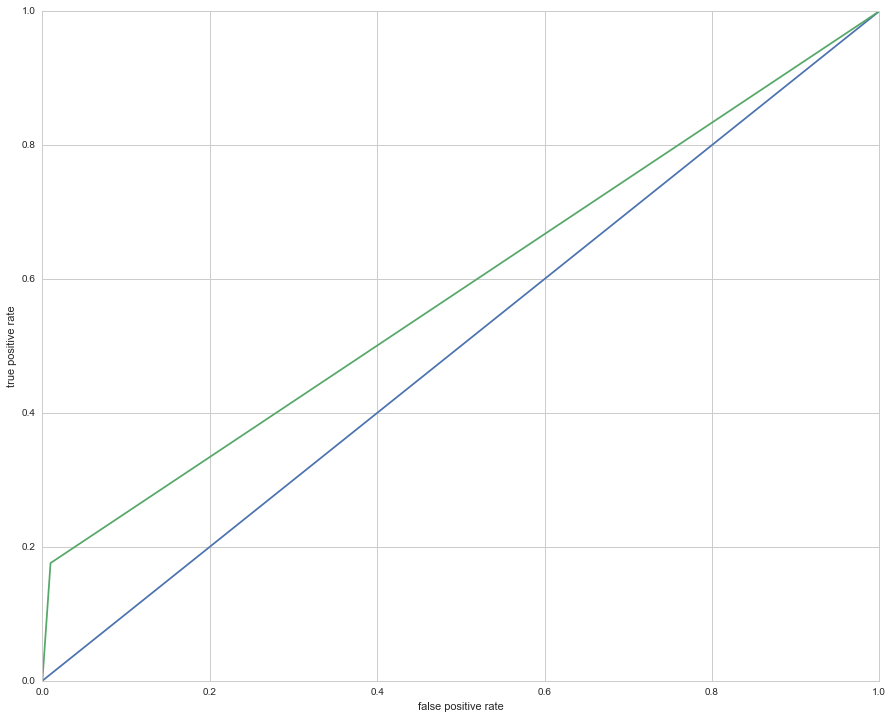

In [104]:
# sklearn has all of this built in:
print 'fpr', metrics.roc_curve(y, treeclf.predict(X))[0][1] #fpr
print 'tpr', metrics.roc_curve(y, treeclf.predict(X))[1][1] #tpr
print 'precision', metrics.precision_score(y, treeclf.predict(X))
print 'accuracy', metrics.accuracy_score(y, treeclf.predict(X))
print 'threshold', bk_thresh

roc = metrics.roc_curve(y, treeclf.predict(X))
plt.figure()
# dummy, what's the worst random job we can do?
plt.plot([0, 0.5, 1], [0, 0.5, 1])
plt.plot(roc[0], roc[1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

##Model Evaluation: Brooklyn
Similar to the Manhattan model, in terms of predicting higher priced, this model is only marginally useful relative to the baseline.  The model precision isn't particularly strong; however, it does better than a coin flip, so while not remarkable, I think there may be some value here.  For all three models, adding in additional features might help improve both prediction accuracy and precision.

Looking at the top 3 features - the gini imporance and rank differ from that of the Manhattan Model:

1. Bedrooms (0.37)
2. Bathrooms (0.19)
3. Number of Reviews (0.17)

Bedrooms again results in the most information gain, but is not nearly as important as it was for Manhattan (0.52 v 0.37).  Bathrooms, which did not make the top three drew greater importance for Brooklyn. Finally Number of Reviews emerges in the top three, but again with less importance than the Manhattan Model (0.29 v. 0.17).

Unsurpisingly, in both cases apartment size plays a role in higher listing prices, as does credibility (number of reviews is a proxy for how many guests a listing has had). Room type had similar importance in both models, (0.7) but for Brooklyn, this importance did not crack the top 3, where as in the case of Manhattan, bathrooms had less importance, perhaps due to less variability. 


In [105]:
test = queens[final].dropna()
X = test[feature_set]
y = test.overpriced
X.describe()

,accommodates,bathrooms,bedrooms,beds,bed_map,minimum_nights,maximum_nights,number_of_reviews,host_listing_count,room_map,prop_map,hood_map
count,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000
mean,2.808309,1.065579,1.125816,1.500297,1.054006,2.347181,719.378042,9.366766,2.259347,0.614837,1.195846,1.286053
std,1.801801,0.298456,0.585518,1.039953,0.449390,2.381378,562.705228,17.981604,2.867591,0.566812,0.417386,1.892623
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1125.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,4.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1125.000000,10.000000,2.000000,1.000000,1.000000,2.000000
max,16.000000,5.500000,6.000000,16.000000,4.000000,27.000000,9999.000000,147.000000,19.000000,2.000000,2.000000,9.000000


In [106]:
sig_features(X, y)

9 Features are worth further consideration. (With P-Values below 0.050000)


['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'number_of_reviews',
 'host_listing_count',
 'room_map',
 'prop_map']

In [107]:
new_feat =  ['accommodates',
             'bathrooms',
             'bedrooms',
             'beds',
             'minimum_nights',
             'number_of_reviews',
             'host_listing_count',
             'room_map',
             'prop_map']

X = test[new_feat]

Best score: 0.790273576591
Best depth: 3


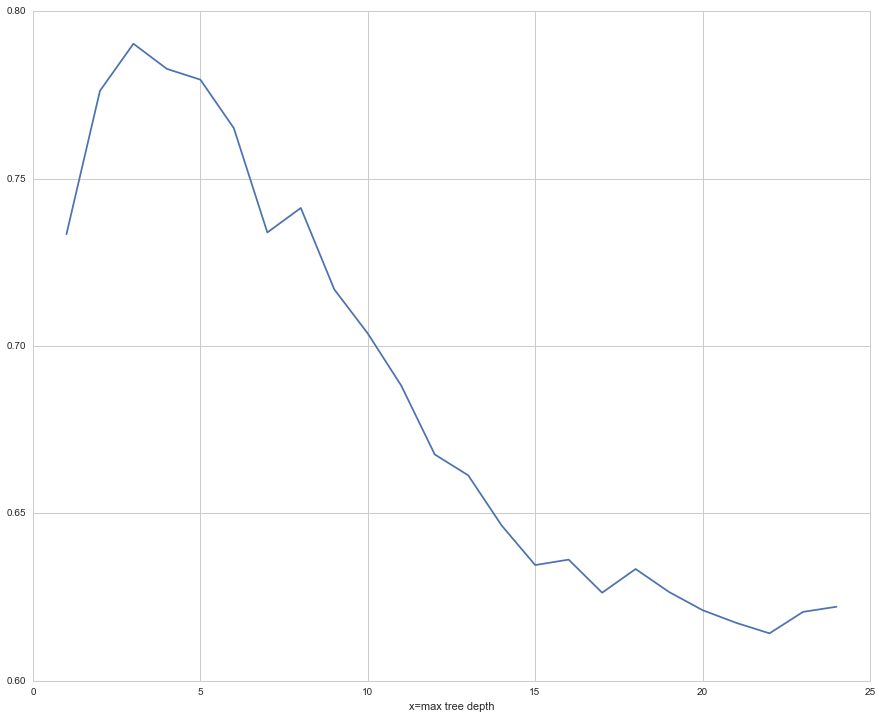

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)
all_scores = []
best_score = 1
best_depth = 0
lo = 1
hi = 25 
for i in range(lo, hi):
    treeclf = DecisionTreeClassifier(max_depth=i, random_state=1)
    score = cross_val_score(treeclf, X, y, cv=3, scoring='roc_auc')
    current_score = np.mean(score)
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score > best_score or best_score == 1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treeclf = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
treeclf.fit(X, y)

plt.figure()
plt.plot(range(lo, hi), all_scores)
plt.xlabel('x=max tree depth')

In [109]:
pd.DataFrame({'feature':new_feat, 'importance':treeclf.feature_importances_})

,feature,importance
0,accommodates,0.000000
1,bathrooms,0.000000
2,bedrooms,0.000000
3,beds,0.000000
4,minimum_nights,0.160538
5,number_of_reviews,0.293935
6,host_listing_count,0.000000
7,room_map,0.545527
8,prop_map,0.000000


In [112]:
new_feat =  ['minimum_nights',
             'number_of_reviews',
             'room_map']
X = test[new_feat]

In [113]:
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
treeclf.fit(X_train, y_train)
pd.DataFrame({'feature':new_feat, 'importance':treeclf.feature_importances_})

,feature,importance
0,minimum_nights,0.133763
1,number_of_reviews,0.316708
2,room_map,0.549528


fpr 0.0386666666667
tpr 0.291891891892
precision 0.482142857143
accuracy 0.887833827893
threshold 0.891405342625


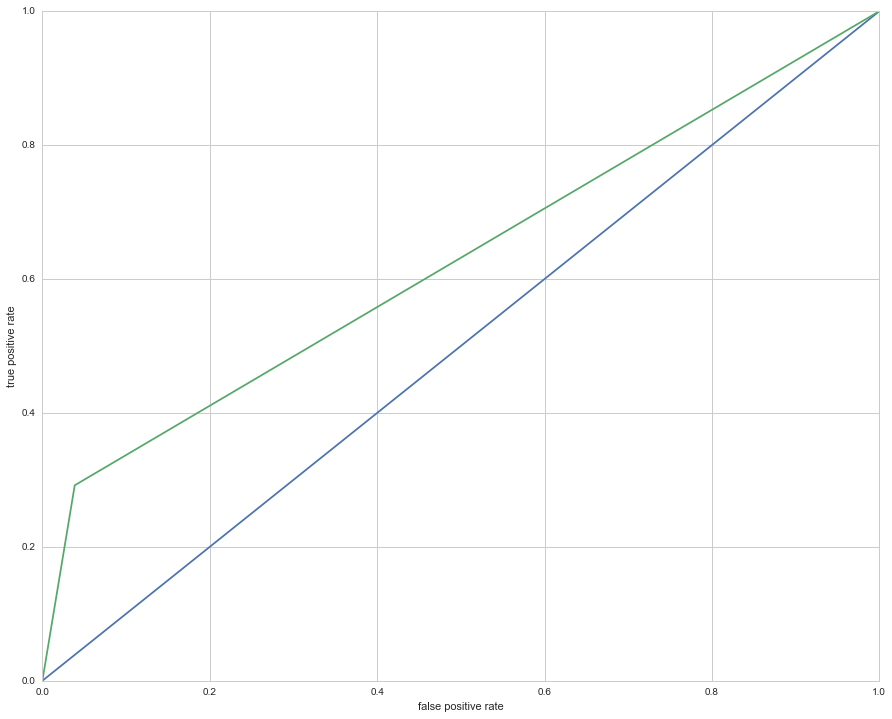

In [115]:
#conf = metrics.confusion_matrix(y, treeclf.predict(X))
#true_conf = true_confusion_matrix(conf)
print 'fpr', metrics.roc_curve(y, treeclf.predict(X))[0][1] #fpr
print 'tpr', metrics.roc_curve(y, treeclf.predict(X))[1][1] #tpr
print 'precision', metrics.precision_score(y, treeclf.predict(X))
print 'accuracy', metrics.accuracy_score(y, treeclf.predict(X))
print 'threshold', qns_thresh

roc = metrics.roc_curve(y, treeclf.predict(X))
plt.figure()
# dummy, what's the worst random job we can do?
plt.plot([0, 0.5, 1], [0, 0.5, 1])
plt.plot(roc[0], roc[1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

##Model Evaluation: Queens
Unlike the other two models, which notably draw on larger datasets, the Queens model does not prove valuable: both the accuracy and precision fall below the most basic thresholds of dumb luck.  In terms of accuracy, you'd be better off assuming no listings have a high price, and in terms of precision, a coin flip does better.

With that in mind, I do not think comparing the gini importance of the features used in this model to those used in the Manhattan and Brooklyn models makes sense. 

#Conclusion
With a preliminary run under my belt, I think there is much I can do to get a stronger model, and in turn, perhaps identify what features contribute most to an AirBnB's listing price.
##Observations
###Exploration Findings and Expectations
* Unsurpisingly, the listing price distribution took a form of a long tail for all boroughs, indicating most listings fall within a small range of values, with only a few exceptional listings having prices outside of even one half a standard deviation from the mean.
* I found some interesting idiosyncracies among the NYC listings.  Notably, 11 listings for boats, almost 50 listings for Dorms along with the odd Castle, Lighthouse, Treehouse or Tent are all available for rent within the 5 boroughs.  Less surprising, perhaps, Manhattan has the highest average listing price.  This is followed by Staten Island, however the number of listings in Staten Island only totals 127, so this number shoud be taken with a large grain of salt. 

###Model performance
My initial attemps to predict whether a listing has a 'high' price within a given borough yeilded very limited results in terms of value.  The main take-away from the two semi-succesful models was that the size and credibility of a listing and it's lister play the largest role in how high a price it commands.  I will take some time to discuss ways I might re-tool this model to improve performance and shed greater light into how AirBnB listers decide to price lisitngs.

###Next Steps
* Additional features to include:
    * More granular neighborhoods - perhaps I can better tease out how neighborhood plays a role in listing price by finding more accurate and granular nieghborhood definitions.  These are somewhat subjective; however, the map I created and used, while valuable for borough, only provided a very high-level neighborhood definition that probably does not reflect the true neighborhood for each listing. Borough/Block/Lot info might be valuable in this case.
    * Gender of lister - on the subject of credibility, I'd be curious if the gender of the lister influences the listing price. I could use the lister name along with a gender predictor or library to investigate this.
    * Nearby attractions, public transport - in addtion to credibility and size, I suspect proximity to cultural and transportation hubs would influence listing desiribility and therefore, price.  There may be a way to compute distances using longitude and lattitude data.
* Vectorizer a better choice?
    * For the neighborhood, as well as room, property and bed type, I took a simple map approach, however this may be suboptimal for a decision tree.  It may improve model performance to use a vectorizer for these categorical features.
* Random Forest to improve performance:
    * Instead of a simple decision tree, I might be able to use the more sophisticated approach provided by a random forest model to improve my results.
